In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize and flatten images
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train_flat = x_train.reshape((len(x_train), 28*28))
x_test_flat = x_test.reshape((len(x_test), 28*28))

print("Training shape:", x_train_flat.shape)
print("Test shape:", x_test_flat.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training shape: (60000, 784)
Test shape: (10000, 784)


In [ ]:
def build_mlp(input_dim=784, num_classes=10):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_dim,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [ ]:
from sklearn.model_selection import train_test_split

splits = [0.2, 0.3, 0.4]  # test sizes
optimizers = ['adam', 'sgd', 'rmsprop']

results = {}

for test_size in splits:
    print(f"\n--- Train-Test split: {1-test_size:.0%}-{test_size:.0%} ---")
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        x_train_flat, y_train, test_size=test_size, random_state=42)

    for opt in optimizers:
        print(f"Training with optimizer: {opt}")
        model = build_mlp()
        model.compile(optimizer=opt,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        history = model.fit(X_train_split, y_train_split,
                            epochs=10,
                            batch_size=128,
                            verbose=0,
                            validation_data=(X_test_split, y_test_split))

        acc = history.history['val_accuracy'][-1]
        print(f"Validation Accuracy: {acc:.4f}")
        results[(test_size, opt)] = acc



--- Train-Test split: 80%-20% ---
Training with optimizer: adam


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation Accuracy: 0.9764
Training with optimizer: sgd
Validation Accuracy: 0.9268
Training with optimizer: rmsprop
Validation Accuracy: 0.9787

--- Train-Test split: 70%-30% ---
Training with optimizer: adam
Validation Accuracy: 0.9736
Training with optimizer: sgd
Validation Accuracy: 0.9244
Training with optimizer: rmsprop
Validation Accuracy: 0.9742

--- Train-Test split: 60%-40% ---
Training with optimizer: adam
Validation Accuracy: 0.9720
Training with optimizer: sgd
Validation Accuracy: 0.9202
Training with optimizer: rmsprop
Validation Accuracy: 0.9629


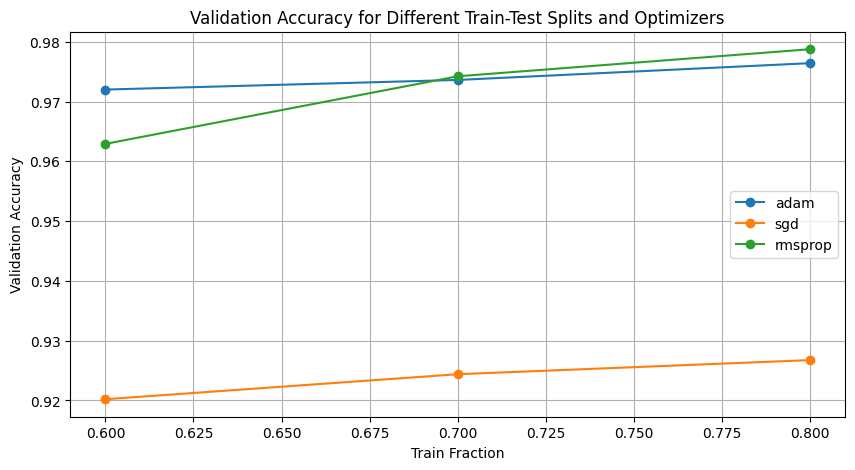

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

for opt in optimizers:
    accs = [results[(split,opt)] for split in splits]
    plt.plot([1-s for s in splits], accs, marker='o', label=opt)

plt.title("Validation Accuracy for Different Train-Test Splits and Optimizers")
plt.xlabel("Train Fraction")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()
